1. Импорт библиотек

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

2. Запишем исходные данные: t - возраст (в неделях) особи женского пола; l_t - вероятность дожития до этого возраста; m_t - среднее число потомков женского пола, рожденных одной особью в этом возрасте.

| t | l_t | m_t |
|----|-----|-----|
| 4.5| 0.87| 20.0|
| 5.5| 0.83| 23.0|
| 6.5| 0.81| 15.0|
| 7.5| 0.80| 12.5|
| 8.5| 0.79| 12.5|
| 9.5| 0.77| 14.0|
|10.5| 0.74| 12.5|
|11.5| 0.66| 14.5|
|12.5| 0.59| 11.0|
|13.5| 0.52|  9.5|
|14.5| 0.45|  2.5|
|15.5| 0.36|  2.5|
|16.5| 0.29|  2.5|
|17.5| 0.25|  4.0|
|18.5| 0.19|  1.0|

In [2]:
t=[4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]
l_t=[0.87, 0.83, 0.81, 0.80, 0.79, 0.77, 0.74, 0.66, 0.59, 0.52, 0.45, 0.36, 0.29, 0.25, 0.19]
m_t=[20.0, 23.0, 15.0, 12.5, 12.5, 14.0, 12.5, 14.5, 11.0, 9.5, 2.5, 2.5, 2.5, 4.0, 1.0]

3. По данным найдём чистый коэффициент воспроизводства (net reproduction rate) по формуле $$ R_0 = \sum_{t} l_tm_t $$

In [27]:
R0=0
i=1
for i in range(len(t)):
    R0=R0+l_t[i]*m_t[i]
print("Чистый коэффицент производства = " + str(R0))

Чистый коэффицент производства = 113.48499999999997


4. Построим график функции левой части уравнения: $$ \sum_{t} e^{-rt}l_tm_t = 1 $$

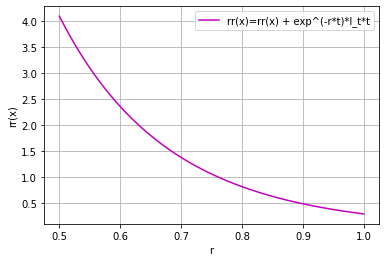

In [29]:
r = np.linspace(0.5, 1, 100)
# r - массив значений внутреннего коэффициента естественной репродукции (Intrinsic Rate of Natural Increase) r.

rr = np.linspace(0, 0, 100)
# rr - массив значений функции на соответствующем элементе массива r

# для каждого r считаем значение функции rr
for i in range(len(rr)):
    for j in range(len(t)):
        rr[i] += np.exp(-r[i] * t[j]) * l_t[j] * m_t[j]

# объявим объект, чтобы нарисовать график
graphic = plt.figure()
gg = graphic.add_subplot(1, 1, 1)
# добавим разметку
gg.grid(which='both')
# добавим график функции
line = gg.plot(r, rr, 'm', label='rr(x)=rr(x) + exp^(-r*t)*l_t*t')
# подпишем оси
plt.xlabel("r")
plt.ylabel("rr(x)")
# добавим легенду графика функции
gg.legend()
# рисуем график
plt.show()

5. Численно решим данное нелинейное уравнение, используя scipy.optimize.brentq.

In [30]:
def f(x):
    R = 0 #переменная для нахождения r через R0
    for i in range(len(t)):
        R =R+np.exp(-x * t[i]) * l_t[i] * m_t[i]
    R -= 1
    return R

In [31]:
solution = brentq(f, a=0.5, b=1)
print("внутренний коэффициент естественной репродукции r = " + str(solution))

внутренний коэффициент естественной репродукции r = 0.7619840766979892


# Вывод

В данной работе я высчитала внутренний коэффициент естественной репродукции (r) особей рисового жука долгоносика (Calandra oryzae), выращиваемых в оптимальных условиях (29 градусов C, пшеница, 14% влажность), по данным из статьи [Birch L.C. The intrinsic rate of natural increase of an insect population. The Journal of Animal Ecology (1948): 15-26].

Для этого я использовала формулу: $ R_0 = \sum_{t} l_tm_t $.
(t - возраст (в неделях) особи женского пола; l_t - вероятность дожития до этого возраста; m_t - среднее число потомков женского пола, рожденных одной особью в этом возрасте.)

Я выяснила, что чистый коэффициент воспроизводства $R_0$ = 113.48499999999997 (113.48).

После этого я построила график функции левой части уравнения $ \sum_{t} e^{-rt}l_tm_t = 1 $, чтобы вычислить внутренний коэффицент естественной репродукции (r).

Затем, численно решила данное нелинейное уравнение, используя scipy.optimize.brentq, и вычислила внутренний коэффициент естественной репродукции r = 0.7619840766979892 (0.7620).